In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing
import sklearn.decomposition
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sn = 3
setnumber = 'FD00' + str(sn)

In [3]:
# read data
print 'read data'
train = pd.read_csv('data/train_'+setnumber+'.csv')
train_RULs = np.array([train.loc[train.id==i, 'cycle'].max() for i in train.id.unique()])
test = pd.read_csv('data/test_'+setnumber+'.csv')
test_RULs = np.array([test.loc[test.id==i, 'RUL'].min() for i in train.id.unique()])
# drop the extra column
print 'drop index column'
train.drop('Unnamed: 0', 1, inplace=True)
test.drop('Unnamed: 0', 1, inplace=True)


read data
drop index column


In [4]:
print 'bin RUL values'
bins = [0, 50, 125, 200, 1000]
status_labels = ['urgent', 'short', 'medium', 'long']
train['status'] = pd.cut(train['RUL'], bins, labels=status_labels)
test['status'] = pd.cut(test['RUL'], bins, labels=status_labels)
print test.status.value_counts()

print 'normalize features (using MinMaxScaler)'
train_scalables = train.loc[:,train.columns.difference(['id', 'cycle', 'status'])].values
test_scalables = test.loc[:,test.columns.difference(['id', 'cycle', 'status'])].values

train_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0,1)).fit(train_scalables)
test_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0,1)).fit(test_scalables)

train_values = train_scaler.transform(train_scalables)
test_values = test_scaler.transform(test_scalables)

train.loc[:,train.columns.difference(['id', 'cycle', 'status'])] = train_values
test.loc[:,test.columns.difference(['id', 'cycle', 'status'])] = test_values

bin RUL values
long      15774
medium      822
urgent        0
short         0
Name: status, dtype: int64
normalize features (using MinMaxScaler)


In [10]:
train_X = train.values[:,:-2]
train_y = train.values[:,-2]
test_X = test.values[:,:-2]
test_y = test.values[:,-2]
train_X

array([[1, 1, 0.4709302325581395, ..., 0.0, 0.5595238095238066,
        0.4463308284627523],
       [1, 2, 0.5465116279069767, ..., 0.0, 0.48809523809523725,
        0.5348362556823467],
       [1, 3, 0.41860465116279066, ..., 0.0, 0.40476190476190155,
        0.45857686241766515],
       ..., 
       [100, 150, 0.40697674418604646, ..., 0.0, 0.1309523809523796,
        0.18146395769552015],
       [100, 151, 0.36627906976744184, ..., 0.0, 0.08333333333333215,
        0.18805083959551183],
       [100, 152, 0.49999999999999994, ..., 0.0, 0.2321428571428541,
        0.1967715001391639]], dtype=object)

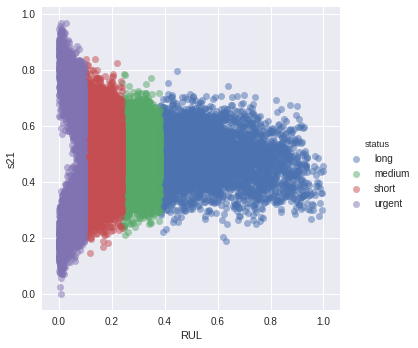

In [11]:
sns.lmplot('RUL', 's21', hue='status', data=train, fit_reg=False, scatter_kws={"alpha": 0.5})
plt.show()

In [19]:
pca = sklearn.decomposition.PCA(n_components=2)
pca.fit(train_X)
train_X = pca.transform(train_X)
evals = pca.explained_variance_ratio_
evals_cs = evals.cumsum()
print evals, evals_cs

[ 0.91951351  0.08048649] [ 0.91951351  1.        ]
